# Milestone 1: Project Data Preparation and Exploratory Data Analysis (EDA)

**Course:** Data Mining  
**Project:** FinMark Customer Segmentation  
**Milestone:** 1 – Exploratory Data Analysis  

This notebook documents the exploratory data analysis (EDA) performed on the cleaned and feature-engineered FinMark datasets. The objective is to understand the structure, patterns, and key characteristics of the data to prepare it for customer segmentation using clustering techniques in subsequent milestones.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 120)

## Dataset Loading

The following preprocessed and feature-engineered datasets were loaded for analysis:
- Transaction Data
- Product Offering Data
- Customer Feedback Data
- Engineered Customer-Level Features

These datasets were prepared during Weeks 2–3 and will serve as the basis for exploratory analysis.

In [5]:
TRANSACTION_PATH = "../Transaction_Data.csv"
PRODUCT_PATH = "../Product_Offering_Data.csv"
FEEDBACK_PATH = "../Customer_Feedback_Data.csv"
ENGINEERED_PATH = "../finmark_engineered_customer_features.csv"

df_txn = pd.read_csv(TRANSACTION_PATH)
df_prod = pd.read_csv(PRODUCT_PATH)
df_fb = pd.read_csv(FEEDBACK_PATH)
df_cust = pd.read_csv(ENGINEERED_PATH)

print("Loaded datasets:")
print("Transactions:", df_txn.shape)
print("Products:", df_prod.shape)
print("Feedback:", df_fb.shape)
print("Customer Features:", df_cust.shape)

Loaded datasets:
Transactions: (5050, 5)
Products: (15, 6)
Feedback: (5050, 4)
Customer Features: (993, 17)


## Dataset Overview

Each dataset represents a different aspect of customer behavior and interaction with FinMark Corporation:

- **Transaction Data** captures individual customer transactions.
- **Product Offering Data** describes available financial products.
- **Customer Feedback Data** records satisfaction and feedback information.
- **Engineered Customer Features** aggregates transaction and behavior data at the customer level.

The engineered customer dataset is the primary dataset used for exploratory analysis and will later serve as the input for clustering.

In [6]:
def dataset_summary(df, name):
    print(f"\n{name}")
    print("-" * len(name))
    display(df.head())
    print("\nShape:", df.shape)
    print("\nData Types:")
    display(df.dtypes.value_counts())
    
dataset_summary(df_txn, "Transaction Data")
dataset_summary(df_prod, "Product Offering Data")
dataset_summary(df_fb, "Customer Feedback Data")
dataset_summary(df_cust, "Engineered Customer Features")


Transaction Data
----------------


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment



Shape: (5050, 5)

Data Types:


int64      2
object     2
float64    1
Name: count, dtype: int64


Product Offering Data
---------------------


,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium



Shape: (15, 6)

Data Types:


object     4
int64      1
float64    1
Name: count, dtype: int64


Customer Feedback Data
----------------------


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7



Shape: (5050, 4)

Data Types:


int64      2
float64    1
object     1
Name: count, dtype: int64


Engineered Customer Features
----------------------------


,customer_id,total_transaction_count,total_transaction_amount,avg_transaction_amount,min_transaction_amount,max_transaction_amount,active_months,last_transaction_date,transaction_frequency_per_month,recency_days,txn_type_prop_bill payment,txn_type_prop_investment,txn_type_prop_loan payment,txn_type_prop_purchase,avg_satisfaction_score,avg_likelihood_to_recommend,feedback_count
0,1,6,16836.0,2806.0,156.0,4993.0,4,2023-07-02 03:00:00,1.500000,26,0.5,0.166667,0.166667,0.166667,8.500000,9.000000,2
1,2,2,4907.0,2453.5,2057.0,2850.0,2,2023-05-21 23:00:00,1.000000,67,0.5,0.000000,0.500000,0.000000,4.333333,5.000000,3
2,3,1,1538.0,1538.0,1538.0,1538.0,1,2023-02-27 23:00:00,1.000000,150,1.0,0.000000,0.000000,0.000000,8.333333,3.666667,3
3,4,2,8295.0,4147.5,3559.0,4736.0,2,2023-06-30 01:00:00,1.000000,28,0.0,0.000000,0.500000,0.500000,5.500000,3.333333,6
4,5,5,14798.0,2959.6,1508.0,4878.0,3,2023-07-27 00:00:00,1.666667,1,0.4,0.200000,0.000000,0.400000,6.444444,5.666667,9



Shape: (993, 17)

Data Types:


float64    11
int64       5
object      1
Name: count, dtype: int64

## Data Cleaning

Data cleaning was performed during the preprocessing phase to ensure accuracy, consistency, and usability of the datasets. This included handling missing values, detecting outliers, and preparing numerical features for analysis.

In [8]:
def missing_summary(df):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    return pd.DataFrame({
        "Missing Count": missing,
        "Missing Percentage": missing_pct
    }).sort_values("Missing Percentage", ascending=False)

missing_summary(df_cust)

,Missing Count,Missing Percentage
customer_id,0,0.0
recency_days,0,0.0
avg_likelihood_to_recommend,0,0.0
avg_satisfaction_score,0,0.0
txn_type_prop_purchase,0,0.0
txn_type_prop_loan payment,0,0.0
txn_type_prop_investment,0,0.0
txn_type_prop_bill payment,0,0.0
transaction_frequency_per_month,0,0.0
total_transaction_count,0,0.0


### Handling Missing Data

Missing values were identified primarily in selected customer-level features. Depending on the feature type and business relevance, missing values were handled using appropriate strategies such as imputation with statistical measures (e.g., mean or median) or exclusion where necessary. These approaches ensure minimal distortion of customer behavior patterns while preserving data integrity.

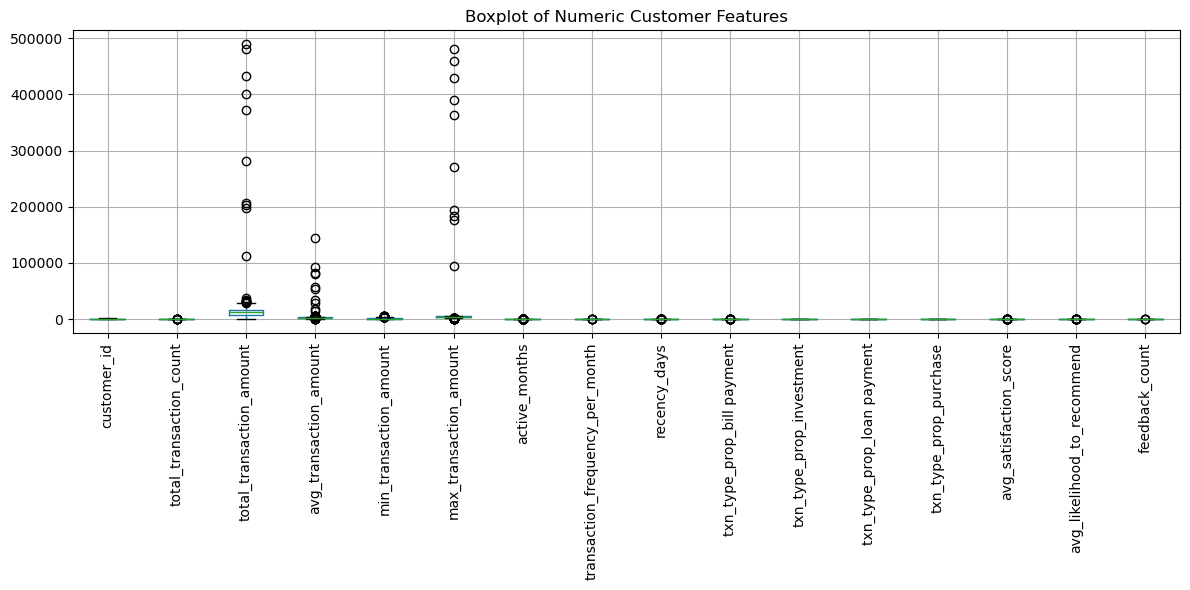

In [10]:
numeric_cols = df_cust.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(12, 6))
df_cust[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Numeric Customer Features")
plt.tight_layout()
plt.show()

### Outlier Detection and Treatment

Outliers were detected using visual inspection through boxplots and statistical summaries. Extreme values were reviewed to determine whether they represented valid high-value customer behavior or data anomalies. Valid extreme observations were retained to preserve meaningful customer differentiation, while erroneous values were addressed during preprocessing.

### Scaling and Normalization

Several numerical features exhibit varying scales, such as transaction frequency and monetary values. Scaling is necessary for clustering algorithms that rely on distance metrics. In the next milestone, numerical features will be standardized to ensure fair contribution of all variables during clustering.

## Feature Engineering

Feature engineering was conducted to transform raw transactional data into meaningful customer-level features. These engineered features capture spending behavior, engagement frequency, and recency, providing a more comprehensive representation of customer profiles.

In [12]:
df_cust.columns

Index(['customer_id', 'total_transaction_count', 'total_transaction_amount', 'avg_transaction_amount',
       'min_transaction_amount', 'max_transaction_amount', 'active_months', 'last_transaction_date',
       'transaction_frequency_per_month', 'recency_days', 'txn_type_prop_bill payment', 'txn_type_prop_investment',
       'txn_type_prop_loan payment', 'txn_type_prop_purchase', 'avg_satisfaction_score', 'avg_likelihood_to_recommend',
       'feedback_count'],
      dtype='object')

### Transformation of Categorical Features

Categorical variables were transformed into numerical representations using encoding techniques. This transformation is essential for clustering algorithms, which require numerical input to compute similarity and distance between observations.

## Exploratory Data Analysis (EDA)

EDA was performed to understand distributions, detect patterns, and explore relationships among customer features. Insights gained from this analysis guide feature selection and model design for customer segmentation.

In [13]:
df_cust.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,993.0,500.871098,288.630791,1.0,251.000000,502.000000,750.000000,1000.0
total_transaction_count,993.0,4.934542,2.158709,1.0,3.000000,5.000000,6.000000,13.0
total_transaction_amount,993.0,15307.199396,33674.460932,76.0,7632.000000,11818.000000,16146.000000,489516.0
avg_transaction_amount,993.0,3071.564449,6983.989570,76.0,2014.000000,2457.875000,2948.000000,144144.0
min_transaction_amount,993.0,1015.244713,952.071749,10.0,324.000000,745.000000,1369.000000,4993.0
max_transaction_amount,993.0,7025.695871,32704.960832,76.0,3592.000000,4347.000000,4734.000000,480300.0
active_months,993.0,3.554884,1.274462,1.0,3.000000,4.000000,4.000000,7.0
transaction_frequency_per_month,993.0,1.382897,0.367627,1.0,1.000000,1.333333,1.600000,3.0
recency_days,993.0,39.325277,37.046695,0.0,11.000000,28.000000,56.000000,197.0
txn_type_prop_bill payment,993.0,0.245026,0.227824,0.0,0.000000,0.222222,0.375000,1.0


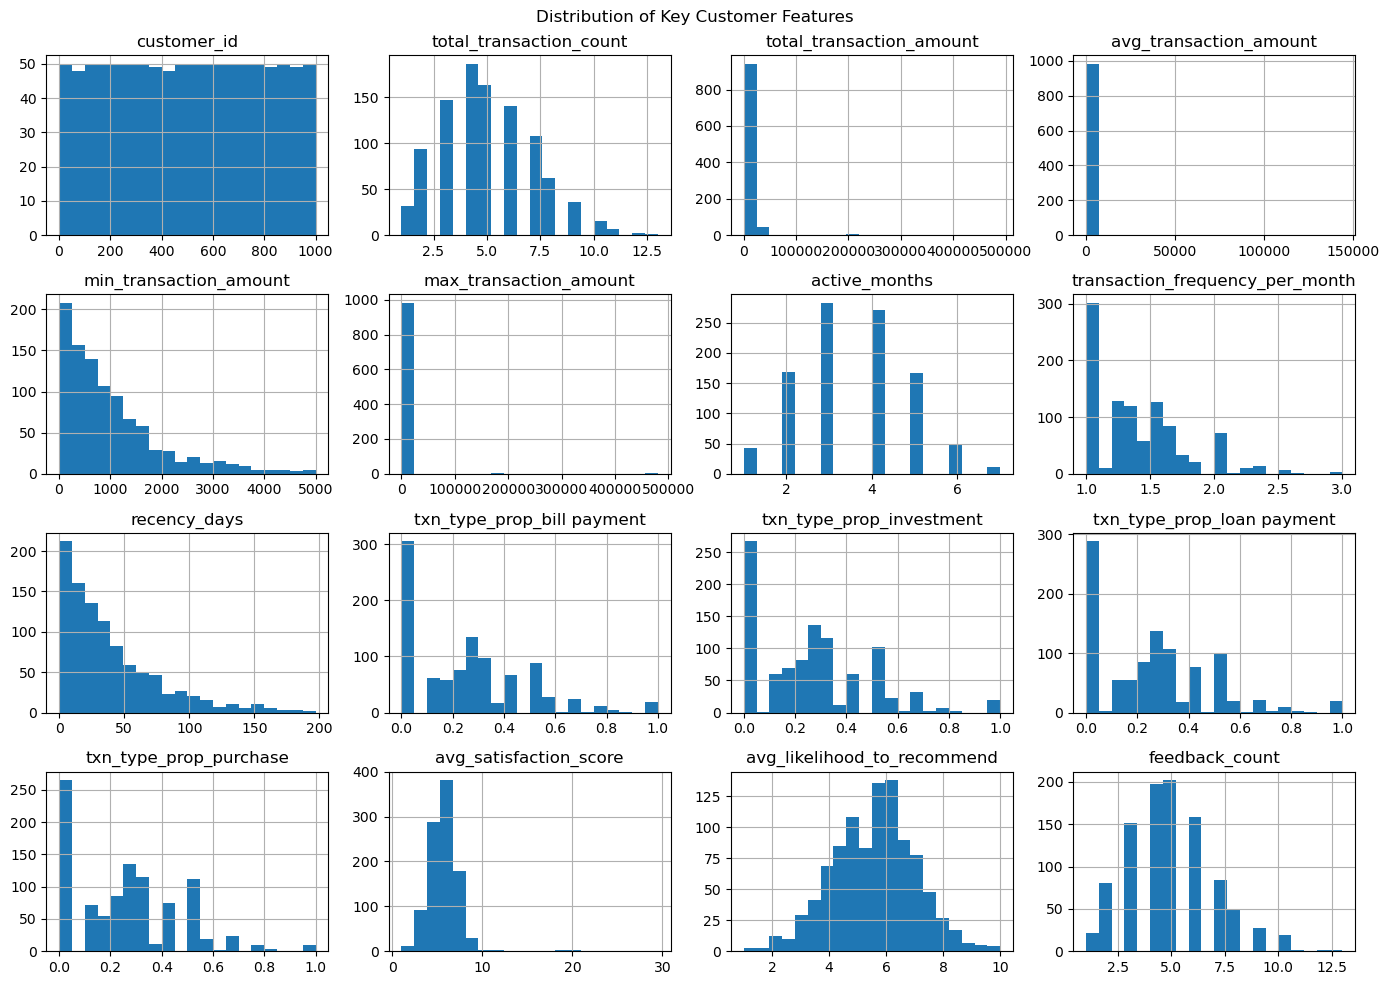

In [14]:
df_cust[numeric_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Distribution of Key Customer Features")
plt.tight_layout()
plt.show()

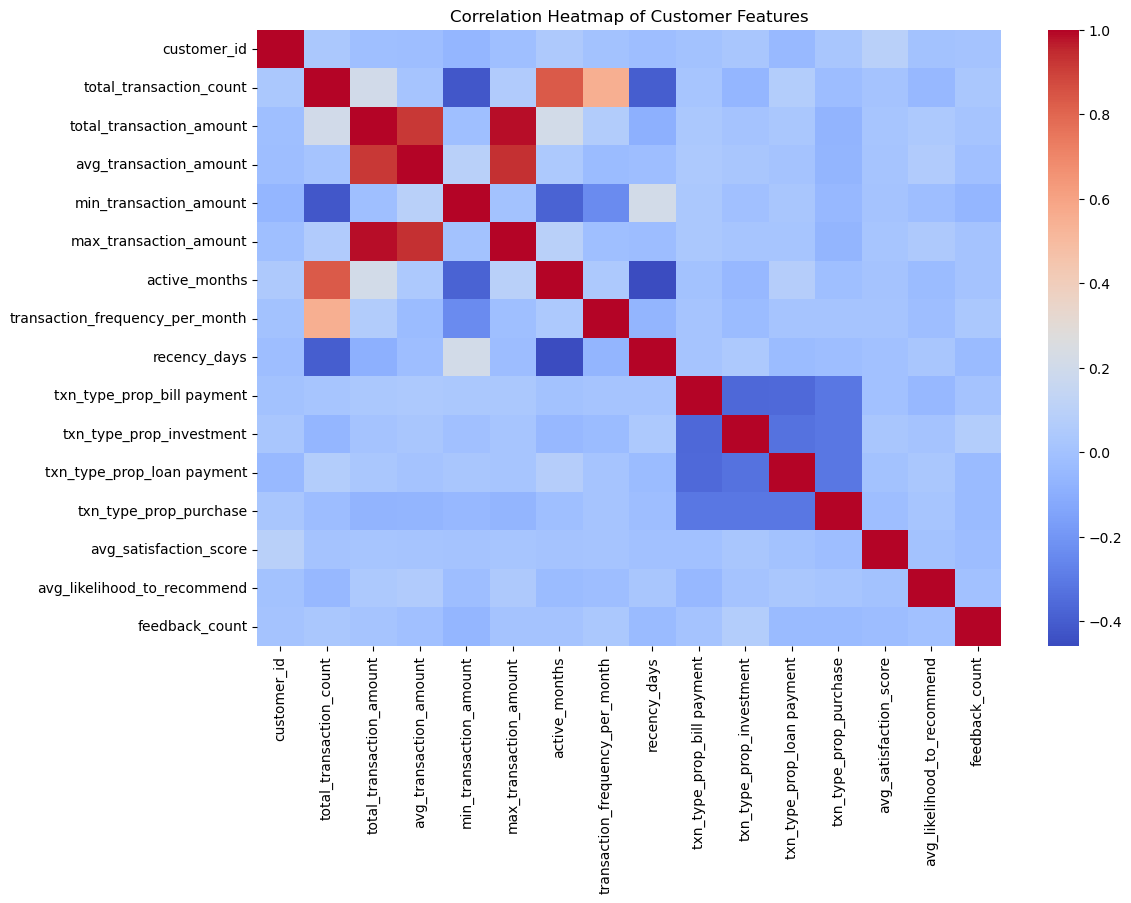

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cust[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Customer Features")
plt.show()

## Key Patterns and Insights

The exploratory analysis revealed distinct variations in customer behavior, particularly in spending intensity, transaction frequency, and engagement levels. Certain features demonstrate strong variability across customers, indicating their potential usefulness in distinguishing customer segments.

High correlations among selected features suggest underlying behavioral groupings, reinforcing the suitability of clustering techniques for segmentation in the next milestone.

### Feature Importance

Features exhibiting high variance and strong behavioral relevance—such as total transaction value, frequency of transactions, and recency metrics—are identified as key inputs for customer segmentation. These features are expected to play a critical role in differentiating customer clusters during the clustering phase.